In [72]:
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        # For plotting graphs
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [73]:
tra=pd.read_csv('C:\\Users\\Hotelsng\\Downloads\\train_u6lujuX_CVtuZ9i.csv')

In [74]:
test_file=pd.read_csv('C:\\Users\\Hotelsng\\Downloads\\test_Y3wMUE5_7gLdaTN.csv')

In [75]:
train_original=tra.copy()
test_original=test_file.copy()
tra.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

68.73 %


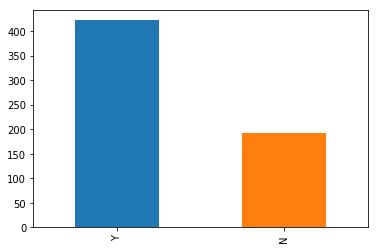

In [76]:
tra['Loan_Status'].value_counts().plot.bar()
gh=tra['Loan_Status'].value_counts()
h= np.array([gh])
hey=100*(np.divide(gh[0],np.sum(gh)))
print(np.round(hey, decimals=2),"%")

In [77]:
tra['Dependents'].value_counts(normalize=True)

0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64

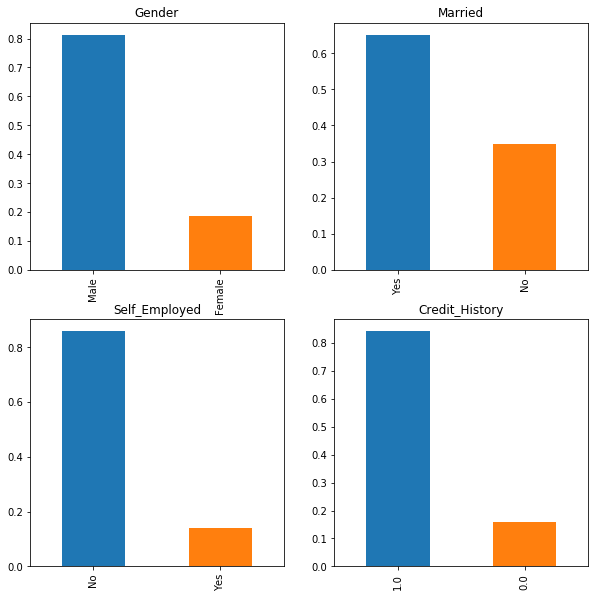

In [78]:
plt.figure(1)
plt.subplot(221)
tra['Gender'].value_counts(normalize=True).plot.bar(figsize=(10,10),title='Gender')

plt.subplot(222)
tra['Married'].value_counts(normalize=True).plot.bar(title='Married')

plt.subplot(223)
tra['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')

plt.subplot(224)
tra['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')

plt.show()

In [79]:
gender= tra['Gender'].value_counts(normalize=True)
gen= np.array(gender)
male= 100*gen[0]
female= 100-male
print("Percentage of male are " , male, "%" )
print("Percentage of female are " , female, "%" )

Percentage of male are  81.36439267886855 %
Percentage of female are  18.635607321131445 %


In [80]:
marrital= tra['Married'].value_counts()
mar= np.array(marrital)
marri= 100*(np.divide(mar[0],np.sum([mar])))
single= 100-marri
print("Percentage of married are " , marri, "%" )
print("Percentage of single are " , single, "%" )

Percentage of married are  65.13911620294598 %
Percentage of single are  34.860883797054015 %


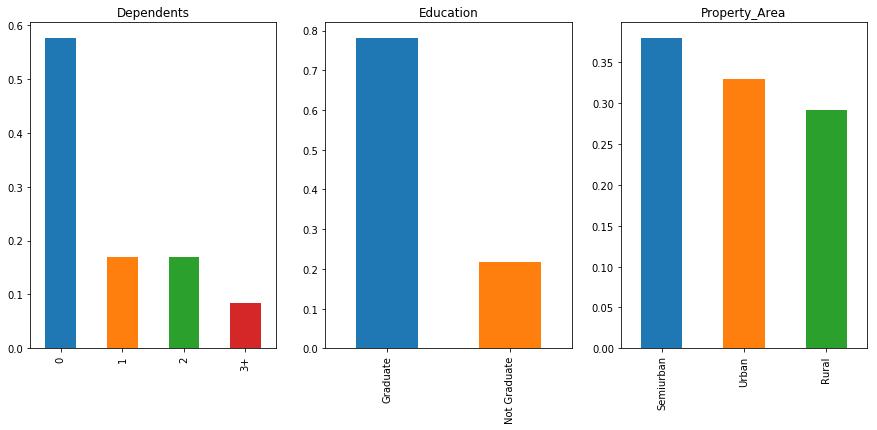

In [81]:
plt.figure(1)
plt.subplot(131)
tra['Dependents'].value_counts(normalize=True).plot.bar(figsize=(15,6) , title='Dependents')
plt.subplot(132)
tra['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.subplot(133)
tra['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

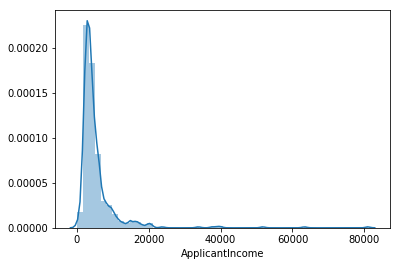

In [82]:
sns.distplot(tra['ApplicantIncome'])

Text(0.5, 0.98, '')

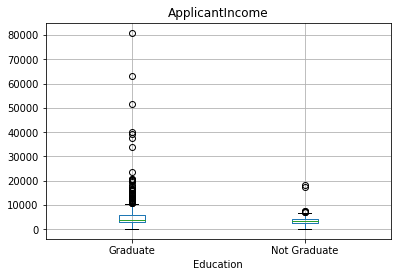

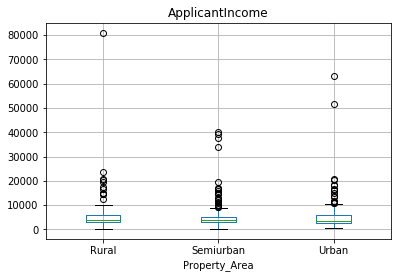

In [83]:

tra.boxplot(column='ApplicantIncome', by= 'Education')
plt.suptitle('')

tra.boxplot(column='ApplicantIncome', by='Property_Area')
plt.suptitle('')


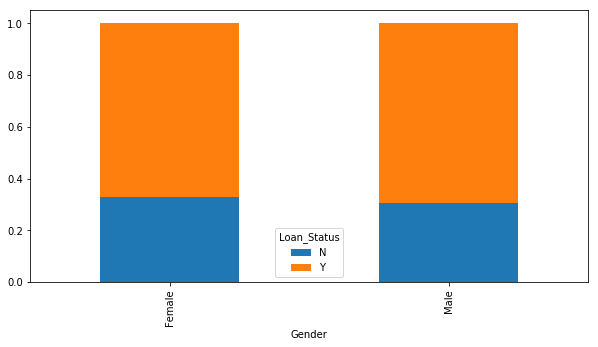

In [84]:
Gender= pd.crosstab(tra['Gender'], tra['Loan_Status'])
Gender.div(Gender.sum(1).astype(float) , axis=0).plot.bar(figsize=(10,5), stacked=True)
#Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

In [85]:
Married=pd.crosstab(tra['Married'], tra['Loan_Status'])

Dependencies= pd.crosstab(tra['Dependents'], tra['Loan_Status'])
Educated= pd.crosstab(tra['Education'], tra['Loan_Status'])
Self_Employment= pd.crosstab(tra['Self_Employed'], tra['Loan_Status'])
Dependencies

Loan_Status,N,Y
Dependents,,
0,107,238
1,36,66
2,25,76
3+,18,33


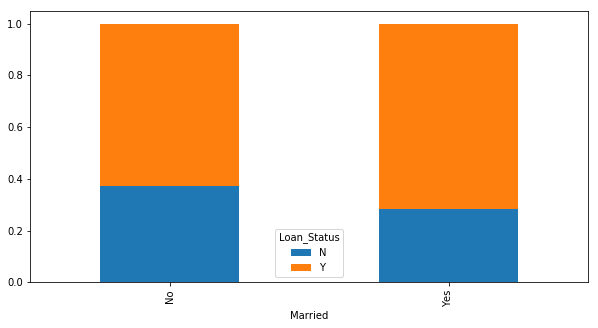

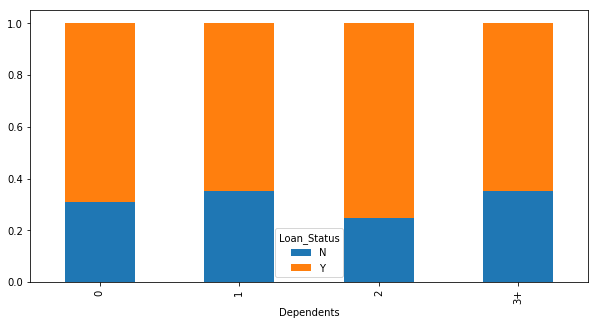

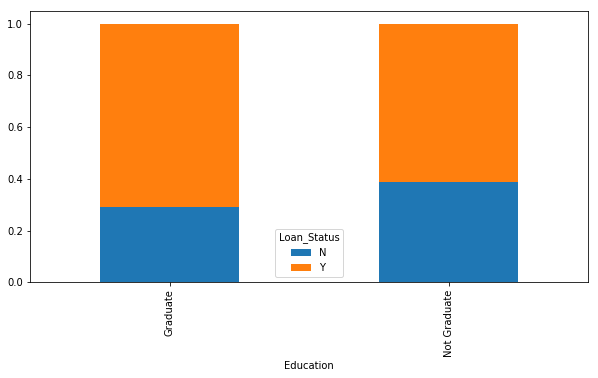

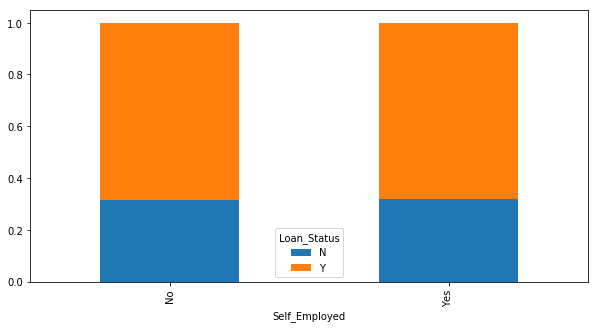

In [86]:

Married.div(Married.sum(1).astype(float) , axis=0).plot(kind='bar', figsize=(10,5), stacked=True)
plt.show()
Dependencies.div(Dependencies.sum(1).astype(float) , axis=0).plot.bar(figsize=(10,5),stacked=True)
plt.show()
Educated.div(Educated.sum(1).astype(float) , axis=0).plot.bar(figsize=(10,5), stacked=True)
plt.show()
Self_Employment.div(Self_Employment.sum(1).astype(float) , axis=0).plot.bar(figsize=(10,5), stacked=True)
plt.show()


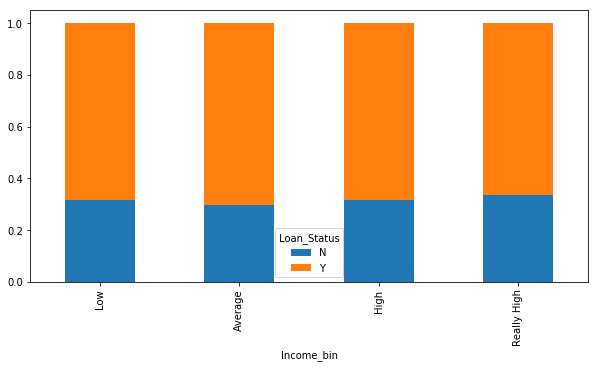

In [87]:
bins= [0,2500,4000,6000,81000]
group=['Low', 'Average', 'High', 'Really High']
tra['Income_bin']= pd.cut(tra['ApplicantIncome'], bins, labels=group)
Income= pd.crosstab(tra['Income_bin'], tra['Loan_Status'])
Income.div(Income.sum(1).astype(int), axis=0).plot.bar(figsize=(10,5), stacked=True)


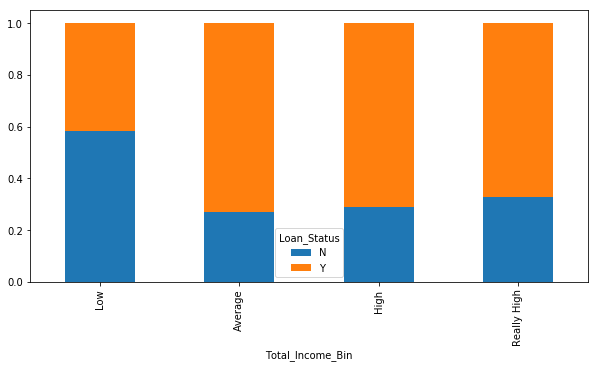

In [88]:
tra['Total_Income']= tra['ApplicantIncome'] +tra['CoapplicantIncome']
tra['Total_Income_Bin']= pd.cut(tra['Total_Income'], bins, labels=group)
Total_Income= pd.crosstab(tra['Total_Income_Bin'], tra['Loan_Status'])
Total_Income.div(Total_Income.sum(1).astype(float), axis=0).plot.bar(figsize=(10,5), stacked=True)

In [111]:
#  sklearn requires we drop the target variable in a separate dataset
#tra['Loan_Status']= tra['Loan_Status'].dropna(how=any)

tra_drop = tra.drop('Loan_Status', 1)
tra_drops = tra.Loan_Status


KeyError: 'Gender'

In [113]:
# dummy variables is used to turn categorical data into a numerical data
tra_drop= pd.get_dummies(tra_drop)
tra= pd.get_dummies(tra)
test_file= pd.get_dummies(test_file)
test_file.dtypes

ApplicantIncome              int64
CoapplicantIncome            int64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_ID_LP001015             uint8
Loan_ID_LP001022             uint8
Loan_ID_LP001031             uint8
Loan_ID_LP001035             uint8
Loan_ID_LP001051             uint8
Loan_ID_LP001054             uint8
Loan_ID_LP001055             uint8
Loan_ID_LP001056             uint8
Loan_ID_LP001059             uint8
Loan_ID_LP001067             uint8
Loan_ID_LP001078             uint8
Loan_ID_LP001082             uint8
Loan_ID_LP001083             uint8
Loan_ID_LP001094             uint8
Loan_ID_LP001096             uint8
Loan_ID_LP001099             uint8
Loan_ID_LP001105             uint8
Loan_ID_LP001107             uint8
Loan_ID_LP001108             uint8
Loan_ID_LP001115             uint8
Loan_ID_LP001121             uint8
Loan_ID_LP001124             uint8
Loan_ID_LP001128             uint8
Loan_ID_LP001135    

In [105]:
#to split the test and train models into random test and train
from sklearn.model_selection import train_test_split

In [107]:
x_train, x_cv, y_train, y_cv= train_test_split(tra_drop, tra_drops, test_size=0.25)

In [108]:
from sklearn.linear_model import LogisticRegression
LogReg=LogisticRegression()
#LogReg.fit(x_train, y_train)

In [109]:
LogReg.fit(x_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').